In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from pycaret.classification import *

Loading the data

In [2]:
fitbit_df = pd.read_pickle('data/fitbit_to_baseline_model.pkl')
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.20,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.80,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,2150.69,44.99934,3079.0,NaN,176.0,4.0,5.0,579.0,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,1.0,0.0,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,-2.346201,1864.23,60.17697,2233.9,63.148837,157.0,0.0,0.0,706.0,NaN,58.144251,29940000.0,0.0,421.0,78.0,0.0,94.0,0.701754,1.368421,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fitbit_df = preprocessing_functions.post_preprocessing(fitbit_df, False)
fitbit_df

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,34.137687,57.432,33.275,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,45.17009,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e301e67b776a240608a72,34.710232,62.544,33.275,14.8,74.0,0.700000,0.700,0.833333,-1.822489,2115.57,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e301367b776a24057738e,33.973496,62.544,33.275,14.8,76.0,0.800000,0.750,0.766667,-1.383149,2147.17,49.73933,5337.8,79.560520,61.0,3.0,43.0,1333.0,72.436947,27540000.0,0.0,402.0,55.0,0.0,95.0,0.985294,0.951613,0.979721,0.982456,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e360b67b776a24039709f,33.973496,68.321,31.413,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,68.243822,27540000.0,0.0,402.0,55.0,0.0,95.0,0.985294,0.951613,0.979721,0.982456,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
5,621e2fce67b776a240279baa,34.783747,83.170,15.941,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,66.474590,30060000.0,0.0,438.0,63.0,0.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,121.0,735.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,33.973496,62.544,33.275,14.8,76.0,0.800000,0.750,0.766667,-1.383149,1339.20,45.17009,5194.3,79.560520,0.0,0.0,0.0,1440.0,66.474590,27540000.0,0.0,402.0,55.0,0.0,95.0,0.985294,0.951613,0.979721,0.982456,7392.0,121.0,1136.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4960,621e310d67b776a24003096d,33.973496,62.544,33.275,14.8,76.0,0.800000,0.750,0.766667,-1.383149,1252.80,45.17009,5194.3,79.560520,0.0,0.0,0.0,1440.0,66.474590,27540000.0,0.0,402.0,55.0,0.0,95.0,0.985294,0.951613,0.979721,0.982456,7392.0,121.0,1136.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4961,621e324e67b776a24

Gender prediction

In [4]:
data = fitbit_df.drop(columns=['age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

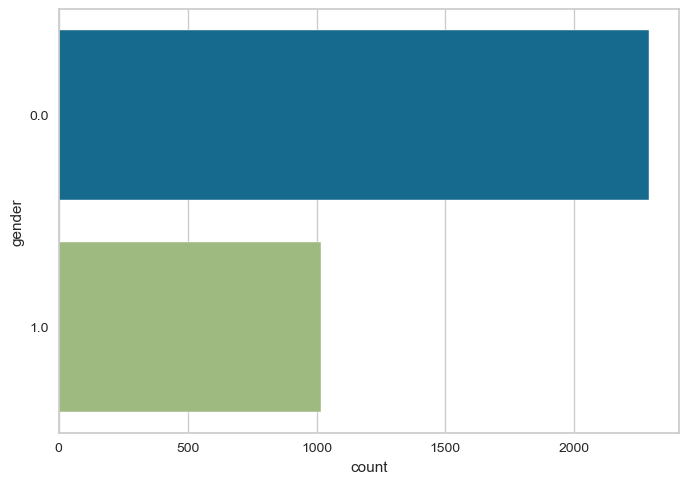

In [5]:
sns.countplot(y="gender", data=train_data)

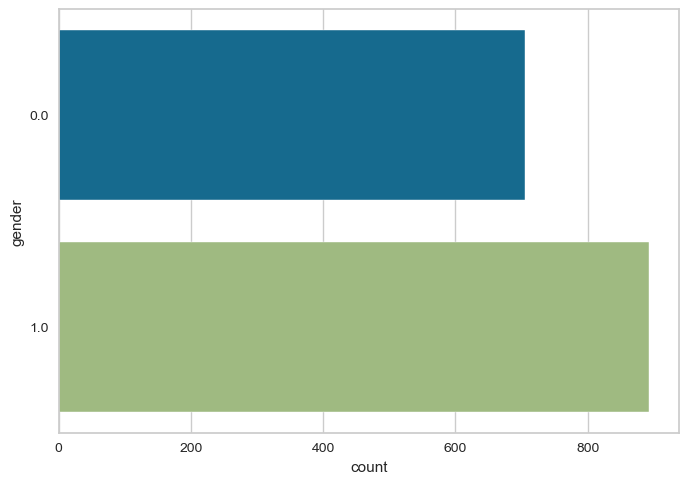

In [6]:
sns.countplot(y="gender", data=test_data)

In [7]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [8]:
target_train = train_data['gender']
train_data.drop(columns=['gender'], inplace=True)
target_test = test_data['gender']
test_data.drop(columns=['gender'], inplace=True)
saved_cols = train_data.columns

In [9]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['gender'] = target_train
test_data['gender'] = target_test

In [14]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6527,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300
et,Extra Trees Classifier,0.5797,0.5079,0.2047,0.3464,0.2410,-0.0028,-0.0019,0.1767
lightgbm,Light Gradient Boosting Machine,0.5645,0.5065,0.2649,0.3420,0.2843,0.0034,0.0005,0.3433
rf,Random Forest Classifier,0.5587,0.5041,0.2216,0.3169,0.2450,-0.0242,-0.0294,0.2167
gbc,Gradient Boosting Classifier,0.5457,0.5048,0.3363,0.3545,0.3242,0.0137,0.0137,0.4833
dt,Decision Tree Classifier,0.5354,0.5055,0.3971,0.3516,0.3665,0.0086,0.0090,0.0433
ada,Ada Boost Classifier,0.5129,0.5007,0.3688,0.3407,0.3314,-0.0148,-0.0154,0.1500
svm,SVM - Linear Kernel,0.5059,0.0000,0.3352,0.3297,0.2636,-0.0296,-0.0357,0.0333
nb,Naive Bayes,0.5027,0.5029,0.5311,0.2549,0.3249,0.0185,0.0234,0.0267
lr,Logistic Regression,0.4995,0.5009,0.5325,0.3567,0.4183,0.0193,0.0212,0.0533


In [16]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
plot_model(best, plot='feature')